In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_recall_curve, accuracy_score, recall_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, cross_val_predict
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import time as tm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
import itertools as it

In [3]:
red = pd.read_csv('winequality-red.csv', delimiter = ';')
white = pd.read_csv('winequality-white.csv', delimiter = ';')

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_y = red.quality
red_X = red.drop("quality", axis = 1)
white_y = white.quality
white_X = white.drop("quality", axis = 1)

<AxesSubplot:xlabel='quality', ylabel='Count'>

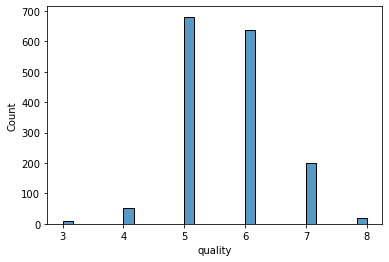

In [12]:
sns.histplot(red_y)

<AxesSubplot:xlabel='quality', ylabel='Count'>

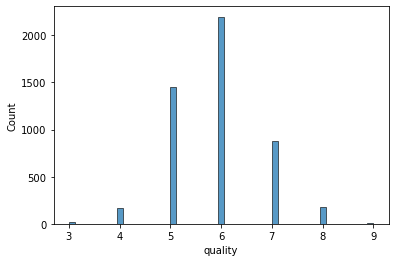

In [15]:
sns.histplot(white_y)

In [6]:
X_train_red, X_test_red, y_train_red,\
y_test_red = train_test_split(red_X, red_y, test_size = 0.25, stratify=red_y)

In [7]:
X_train_white, X_test_white, y_train_white,\
y_test_white = train_test_split(white_X, white_y, test_size = 0.25, stratify=white_y)

In [8]:
X_train_red_copy = X_train_red.copy()
X_test_red_copy = X_test_red.copy()
X_train_white_copy = X_train_white.copy()
X_test_white_copy = X_test_white.copy()
X_train_red_copy['type'] = 'red'
X_test_red_copy['type'] = 'red'
X_train_white_copy['type'] = 'white'
X_test_white_copy['type'] = 'white'

In [9]:
combined_train_X = pd.concat([X_train_red_copy, X_train_white_copy], axis = 0)
combined_train_y = pd.concat([y_train_red, y_train_white])
combined_test_X = pd.concat([X_test_red_copy, X_test_white_copy], axis = 0)
combined_test_y = pd.concat([y_test_red, y_test_white])
combined_train_X = pd.get_dummies(combined_train_X)
combined_test_X = pd.get_dummies(combined_test_X)

In [10]:
X_train_red.to_csv('red_train_x.csv', index = False)
X_train_white.to_csv('white_train_x.csv', index = False)
y_train_red.to_csv('red_train_y.csv', index = False)
y_train_white.to_csv('white_train_y.csv', index = False)
X_test_red.to_csv('red_test_x.csv', index = False)
X_test_white.to_csv('white_test_x.csv', index = False)
y_test_red.to_csv('red_test_y.csv', index = False)
y_test_white.to_csv('white_test_y.csv', index = False)
combined_train_X.to_csv("combined_train_x", index = False)
combined_train_y.to_csv("combined_train_y", index = False)
combined_test_X.to_csv("combined_test_x", index = False)
combined_test_y.to_csv("combined_test_y", index = False)